In [1]:
import pandas as pd
data=pd.read_csv('data/d_train_20180102.csv')
data.head()

,id,性别,年龄,体检日期,*天门冬氨酸氨基转换酶,*丙氨酸氨基转换酶,*碱性磷酸酶,*r-谷氨酰基转换酶,*总蛋白,白蛋白,...,血小板计数,血小板平均体积,血小板体积分布宽度,血小板比积,中性粒细胞%,淋巴细胞%,单核细胞%,嗜酸细胞%,嗜碱细胞%,血糖
0,1,男,41,12/10/2017,24.96,23.10,99.59,20.23,76.88,49.60,...,166.0,9.9,17.4,0.164,54.1,34.2,6.5,4.7,0.6,6.06
1,2,男,41,19/10/2017,24.57,36.25,67.21,79.00,79.43,47.76,...,277.0,9.2,10.3,0.260,52.0,36.7,5.8,4.7,0.8,5.39
2,3,男,46,26/10/2017,20.82,15.23,63.69,38.17,86.23,48.00,...,241.0,8.3,16.6,0.199,48.1,40.3,7.7,3.2,0.8,5.59
3,4,女,22,25/10/2017,14.99,10.59,74.08,20.22,70.98,44.02,...,252.0,10.3,10.8,0.260,41.7,46.5,6.7,4.6,0.5,4.30
4,5,女,48,26/10/2017,20.07,14.78,75.79,22.72,78.05,41.83,...,316.0,11.1,14.0,0.350,56.6,33.1,9.1,0.6,0.6,5.42


In [2]:
from sklearn.preprocessing import LabelEncoder
import numpy as np
print(np.unique(data['性别'].values))
LE=LabelEncoder()
sex=LE.fit_transform(data['性别'].values)
data['性别']=sex
data.pop('体检日期')
data.pop('id')
nan_1={'乙肝表面抗原':0,'乙肝表面抗体':0,'乙肝e抗原':0,'乙肝e抗体':0,'乙肝核心抗体':0}
data.fillna(value=nan_1,inplace=True)
# data.fillna(data.mean(),inplace=True)
data.head()

['女' '男']


,性别,年龄,*天门冬氨酸氨基转换酶,*丙氨酸氨基转换酶,*碱性磷酸酶,*r-谷氨酰基转换酶,*总蛋白,白蛋白,*球蛋白,白球比例,...,血小板计数,血小板平均体积,血小板体积分布宽度,血小板比积,中性粒细胞%,淋巴细胞%,单核细胞%,嗜酸细胞%,嗜碱细胞%,血糖
0,1,41,24.96,23.10,99.59,20.23,76.88,49.60,27.28,1.82,...,166.0,9.9,17.4,0.164,54.1,34.2,6.5,4.7,0.6,6.06
1,1,41,24.57,36.25,67.21,79.00,79.43,47.76,31.67,1.51,...,277.0,9.2,10.3,0.260,52.0,36.7,5.8,4.7,0.8,5.39
2,1,46,20.82,15.23,63.69,38.17,86.23,48.00,38.23,1.26,...,241.0,8.3,16.6,0.199,48.1,40.3,7.7,3.2,0.8,5.59
3,0,22,14.99,10.59,74.08,20.22,70.98,44.02,26.96,1.63,...,252.0,10.3,10.8,0.260,41.7,46.5,6.7,4.6,0.5,4.30
4,0,48,20.07,14.78,75.79,22.72,78.05,41.83,36.22,1.15,...,316.0,11.1,14.0,0.350,56.6,33.1,9.1,0.6,0.6,5.42


In [3]:
X=data.values[:,0:-1]
y=data.values[:,-1]
# # poly
# from sklearn.preprocessing import PolynomialFeatures
# poly = PolynomialFeatures(2)
# X=poly.fit_transform(X)
print(X.shape)
np.random.seed(10)
index=np.arange(X.shape[0])
np.random.shuffle(index)
print(index)
X_train=X[index[0:int(len(index)*0.8)],:]
y_train=y[index[0:int(len(index)*0.8)]]
X_val=X[index[int(len(index)*0.8):]]
y_val=y[index[int(len(index)*0.8):]]

# feat_names=[]
# for i in range(X.shape[1]):
#     feat_names.append(str(i))
feat_names=list(data.columns)
feat_names.remove('血糖')
print(feat_names)

(5642, 39)
[4519   29 3127 ..., 1344 4623 1289]
['性别', '年龄', '*天门冬氨酸氨基转换酶', '*丙氨酸氨基转换酶', '*碱性磷酸酶', '*r-谷氨酰基转换酶', '*总蛋白', '白蛋白', '*球蛋白', '白球比例', '甘油三酯', '总胆固醇', '高密度脂蛋白胆固醇', '低密度脂蛋白胆固醇', '尿素', '肌酐', '尿酸', '乙肝表面抗原', '乙肝表面抗体', '乙肝e抗原', '乙肝e抗体', '乙肝核心抗体', '白细胞计数', '红细胞计数', '血红蛋白', '红细胞压积', '红细胞平均体积', '红细胞平均血红蛋白量', '红细胞平均血红蛋白浓度', '红细胞体积分布宽度', '血小板计数', '血小板平均体积', '血小板体积分布宽度', '血小板比积', '中性粒细胞%', '淋巴细胞%', '单核细胞%', '嗜酸细胞%', '嗜碱细胞%']


In [11]:
import lightgbm as lgb
from sklearn.model_selection import ParameterGrid
import matplotlib.pyplot as plt
params = {
    'metric': ['mse'],
    'objective': ['regression'],
    'learning_rate':[0.15],
    'feature_fraction': [0.8],
    'max_depth': [4],
    'num_leaves':[80],
    'bagging_fraction': [0.8],
    'bagging_freq':[5],
    'min_data_in_leaf':[5],
    'min_gain_to_split':[0],
    'lambda_l1':[1],
    'lambda_l2':[1],
    'verbose':[0]
}
params=list(ParameterGrid(params))
lgbtrain=lgb.Dataset(X_train,label=y_train,feature_name=feat_names,categorical_feature=[0])
lgbeval=lgb.Dataset(X_val,label=y_val,reference=lgbtrain,feature_name=feat_names,
                    categorical_feature=[0])
for param in params:
    print(param)
    clf = lgb.train(param, lgbtrain, valid_sets=lgbeval, num_boost_round=300,
                    early_stopping_rounds=50, categorical_feature=[0])
    print('best interation:'+str(clf.best_iteration))
    

{'bagging_fraction': 0.8, 'bagging_freq': 5, 'feature_fraction': 0.8, 'lambda_l1': 1, 'lambda_l2': 1, 'learning_rate': 0.15, 'max_depth': 4, 'metric': 'mse', 'min_data_in_leaf': 5, 'min_gain_to_split': 0, 'num_leaves': 80, 'objective': 'regression', 'verbose': 0}
[1]	valid_0's l2: 1.775
Training until validation scores don't improve for 50 rounds.
[2]	valid_0's l2: 1.71255
[3]	valid_0's l2: 1.66761
[4]	valid_0's l2: 1.64529
[5]	valid_0's l2: 1.61927
[6]	valid_0's l2: 1.59471
[7]	valid_0's l2: 1.57105
[8]	valid_0's l2: 1.56305
[9]	valid_0's l2: 1.55946
[10]	valid_0's l2: 1.54274
[11]	valid_0's l2: 1.53716
[12]	valid_0's l2: 1.52609
[13]	valid_0's l2: 1.51744
[14]	valid_0's l2: 1.50636
[15]	valid_0's l2: 1.50912
[16]	valid_0's l2: 1.512
[17]	valid_0's l2: 1.51132
[18]	valid_0's l2: 1.50767
[19]	valid_0's l2: 1.5069
[20]	valid_0's l2: 1.5118
[21]	valid_0's l2: 1.50038
[22]	valid_0's l2: 1.49632
[23]	valid_0's l2: 1.496
[24]	valid_0's l2: 1.48385
[25]	valid_0's l2: 1.46832
[26]	valid_0's l

/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py:668: UserWarning: categorical_feature in param dict is overrided.
  warnings.warn('categorical_feature in param dict is overrided.')


[54]	valid_0's l2: 1.43924
[55]	valid_0's l2: 1.43628
[56]	valid_0's l2: 1.43674
[57]	valid_0's l2: 1.44305
[58]	valid_0's l2: 1.44001
[59]	valid_0's l2: 1.44228
[60]	valid_0's l2: 1.44324
[61]	valid_0's l2: 1.44591
[62]	valid_0's l2: 1.44633
[63]	valid_0's l2: 1.44576
[64]	valid_0's l2: 1.44834
[65]	valid_0's l2: 1.44841
[66]	valid_0's l2: 1.45009
[67]	valid_0's l2: 1.45344
[68]	valid_0's l2: 1.45341
[69]	valid_0's l2: 1.45397
[70]	valid_0's l2: 1.45659
[71]	valid_0's l2: 1.45585
[72]	valid_0's l2: 1.45295
[73]	valid_0's l2: 1.44898
[74]	valid_0's l2: 1.45055
[75]	valid_0's l2: 1.45137
[76]	valid_0's l2: 1.45231
[77]	valid_0's l2: 1.45073
[78]	valid_0's l2: 1.45679
[79]	valid_0's l2: 1.45634
[80]	valid_0's l2: 1.46075
[81]	valid_0's l2: 1.46198
[82]	valid_0's l2: 1.46339
[83]	valid_0's l2: 1.46035
[84]	valid_0's l2: 1.46043
[85]	valid_0's l2: 1.46061
[86]	valid_0's l2: 1.46137
[87]	valid_0's l2: 1.46342
[88]	valid_0's l2: 1.46327
[89]	valid_0's l2: 1.46749
[90]	valid_0's l2: 1.46615
[

/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


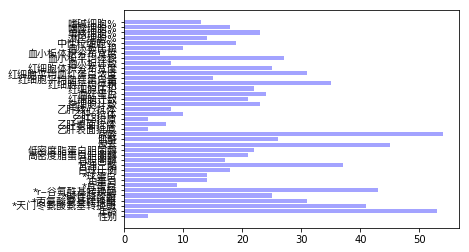

In [7]:
# feature importance
from matplotlib.font_manager import FontManager, FontProperties
def getChineseFont():
    return FontProperties(fname='/System/Library/Fonts/PingFang.ttc')
feature_importance=list(clf.feature_importance())
y_pos = np.arange(len(feat_names))
plt.barh(y_pos,feature_importance,align = 'center',alpha = 0.2,color='b')
plt.yticks(y_pos,feat_names,fontproperties=getChineseFont())
plt.show()